In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

df = pd.read_csv('data/raw_data.csv')
df.drop(columns='Row Number', inplace=True)

df = df[['Area', 'Item', 'Year', 'Production', 'Import Quantity', 'Export Quantity']]
df.rename(columns={'Area': 'Country', 'Item':'Produce', 'Production':'Production Quantity'}, inplace=True)

df.head() 

,Country,Produce,Year,Production Quantity,Import Quantity,Export Quantity
0,Armenia,Potatoes,2000,290260.0,390.0,300.0
1,Armenia,Potatoes,2001,363834.0,2290.0,0.0
2,Armenia,Potatoes,2002,374263.0,1918.0,0.0
3,Armenia,Potatoes,2003,507518.0,2853.0,7.0
4,Armenia,Potatoes,2004,576427.0,1553.0,0.0


In [2]:
# create a lookup table for countries and their centroid locations
countries_lookup = pd.read_csv('data/country_centroids.csv')
set(df[~df['Country'].isin(countries_lookup['name'])]['Country'])

lookup = countries_lookup
lookup.rename(columns={'country':'code'}, inplace=True)
lookup.index = lookup['name']
(lookup.drop(columns=['name'])).to_csv('data/countries_lookup.csv')


# FIXME --------------------------------------------------------------------------
# ********************************************************************************
# Assuming that China is a sum of mainland, taiwan, hong kong and macao
# 'Serbia and Montenegro' - set coordinates to average of Serbia and Montenegro
# 'South Sudan' and 'Sudan (former)'- set coordinates to Sudan's coordinates

In [3]:
# remove the regions printed above from the dataframe
df = df[df['Country'].isin(countries_lookup['name'])]
df.index = df['Country']
df.drop(columns='Country', inplace=True)
df.to_csv('data/relevant_data.csv')

In [4]:
# create a set of produce that shows up in the dataset
produce = (pd.Series(list(set(df['Produce'])))).sort_values()
produce.to_csv('data/produce.csv', index=False, header=['Produce'])

# create a set of years that show up in the dataset
years = (pd.Series(list(set(df['Year'])))).sort_values()
years.to_csv('data/years.csv', index=False, header=['Year'])

['#a1c9f4',
 '#ffb482',
 '#8de5a1',
 '#ff9f9b',
 '#d0bbff',
 '#debb9b',
 '#fab0e4',
 '#cfcfcf',
 '#fffea3',
 '#b9f2f0',
 '#a1c9f4',
 '#ffb482',
 '#8de5a1',
 '#ff9f9b',
 '#d0bbff']

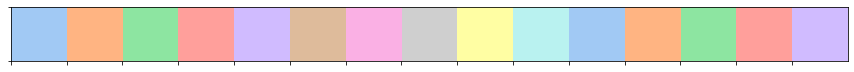

In [8]:
# palette generation
map_palette = sns.color_palette('pastel', 15)
sns.palplot(map_palette)
map_palette.as_hex()